# Customer Service Request Analysis

In [1]:
import pandas as pd
import numpy as np
import os
os.chdir(r"C:\Users\lenovo\Desktop\Simplilearn\Applied Data Science\Project - Applied Data Science with Python\Project_Two_Dataset")

In [2]:
df_service_requests = pd.read_excel("311_Service_Requests_from_2010_to_Present.xlsx")

In [3]:
df_service_requests.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

- Identify the shape of the dataset

In [4]:
df_service_requests.shape

(364558, 53)

- Identify variables with null values

In [5]:
##df_service_requests[df_service_requests.columns[df_service_requests.isna().any()]]
df_service_requests.isnull().sum()
## All >0 columns has some missing values in them.

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

- Utilize missing value treatment

> Columns with more than 80% missing values should be dropped as it serves no purpose in the analysis. Also most of them are address related which is not siginificant in our case.

In [6]:
df_service_requests.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [7]:
df_service_requests.isnull().sum()*100/len(df_service_requests)

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                         0.653120
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.783255
Location Type                       0.036483
Incident Zip                        0.822366
Incident Address                   14.181283
Street Name                        14.181283
Cross Street 1                     15.686941
Cross Street 2                     15.856187
Intersection Street 1              85.977540
Intersection Street 2              86.144317
Address Type                        0.892039
City                                0.822091
Landmark                           99.897136
Facility Type                       0.655314
Status                              0.000000
Due Date                            0.000823
Resolution Description              0.000000
Resolution

In [8]:
df_service_requests.drop(['Intersection Street 1','Intersection Street 2','Landmark',
                         'School or Citywide Complaint','Vehicle Type','Taxi Company Borough',
                        'Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
                        'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name'],axis=1,inplace=True)

In [9]:
df_service_requests.isnull().sum()*100/len(df_service_requests)

Unique Key                         0.000000
Created Date                       0.000000
Closed Date                        0.653120
Agency                             0.000000
Agency Name                        0.000000
Complaint Type                     0.000000
Descriptor                         1.783255
Location Type                      0.036483
Incident Zip                       0.822366
Incident Address                  14.181283
Street Name                       14.181283
Cross Street 1                    15.686941
Cross Street 2                    15.856187
Address Type                       0.892039
City                               0.822091
Facility Type                      0.655314
Status                             0.000000
Due Date                           0.000823
Resolution Description             0.000000
Resolution Action Updated Date     0.658880
Community Board                    0.000000
Borough                            0.000000
X Coordinate (State Plane)      

In [10]:
# Looking at all remaining columns with missing values
df_service_requests[['Closed Date','Descriptor','Location Type','Incident Zip','Incident Address','Street Name','Cross Street 1','Cross Street 2',
                    'Address Type','City','Facility Type','X Coordinate (State Plane)','Y Coordinate (State Plane)','Latitude','Longitude','Location']]

,Closed Date,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Facility Type,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Location
0,2016-01-01 00:55:15,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,ADDRESS,NEW YORK,Precinct,1005409.0,254678.0,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,2016-01-01 01:26:57,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,ADDRESS,ASTORIA,Precinct,1007766.0,221986.0,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,2016-01-01 04:51:03,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,ADDRESS,BRONX,Precinct,1015081.0,256380.0,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,2016-01-01 07:43:13,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,ADDRESS,BRONX,Precinct,1031740.0,243899.0,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,2016-01-01 03:24:42,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,ADDRESS,ELMHURST,Precinct,1019123.0,206375.0,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,2015-01-01 10:22:31,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,85 ROAD,FOREST PARKWAY,85 STREET,ADDRESS,WOODHAVEN,Precinct,1022809.0,192567.0,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,2015-01-01 02:25:02,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,SEDGWICK AVENUE,BAILEY AVENUE,BEND,ADDRESS,BRONX,Precinct,1009923.0,255465.0,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,2015-01-01 00:20:33,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,WEST 139 STREET,AMSTERDAM AVENUE,HAMILTON PLACE,ADDRESS,NEW YORK,Precinct,997847.0,238629.0,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,2015-01-01 02:42:22,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,EAST 226 STREET,BRONXWOOD AVENUE,PAULDING AVENUE,ADDRESS,BRONX,Precinct,1024816.0,262237.0,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"


In [11]:
df_service_requests['Facility Type'].unique()

array(['Precinct', nan], dtype=object)

In [12]:
# dropping all columns that has no significance
df_service_requests.drop(['Incident Zip','Incident Address','Street Name','Cross Street 1',
                          'Cross Street 2','Address Type','Location'],axis=1,inplace=True)

In [13]:
# dropping all rows with missing dates as all of the date columns and others that have a very tiny percentage of missing values and provide no value.
df_service_requests.dropna(subset=['Closed Date','Due Date','Resolution Action Updated Date','School Zip'],axis=0,inplace=True)

In [14]:
mode1=df_service_requests['Facility Type'].mode().values[0]
mode2=df_service_requests['Descriptor'].mode().values[0]
mode3=df_service_requests['Location Type'].mode().values[0]
mode4=df_service_requests['City'].mode().values[0]
print(mode1)
print(mode2)
print(mode3)
print(mode4)

Precinct
No Access
Street/Sidewalk
BROOKLYN


In [15]:
## Using some functions to impute rest of the missing values
df_service_requests['Facility Type'].fillna(mode1,inplace=True)
df_service_requests['Descriptor'].fillna(mode2,inplace=True)
df_service_requests['Location Type'].fillna(mode3,inplace=True)
df_service_requests['City'].fillna(mode4,inplace=True)
df_service_requests['X Coordinate (State Plane)'].fillna(df_service_requests['X Coordinate (State Plane)'].mean(),inplace=True)
df_service_requests['Y Coordinate (State Plane)'].fillna(df_service_requests['Y Coordinate (State Plane)'].mean(),inplace=True)
df_service_requests['Longitude'].fillna(df_service_requests['Longitude'].mean(),inplace=True)
df_service_requests['Latitude'].fillna(df_service_requests['Latitude'].mean(),inplace=True)

In [16]:
df_service_requests.isnull().sum()*100/len(df_service_requests)

Unique Key                        0.0
Created Date                      0.0
Closed Date                       0.0
Agency                            0.0
Agency Name                       0.0
Complaint Type                    0.0
Descriptor                        0.0
Location Type                     0.0
City                              0.0
Facility Type                     0.0
Status                            0.0
Due Date                          0.0
Resolution Description            0.0
Resolution Action Updated Date    0.0
Community Board                   0.0
Borough                           0.0
X Coordinate (State Plane)        0.0
Y Coordinate (State Plane)        0.0
Park Facility Name                0.0
Park Borough                      0.0
School Name                       0.0
School Number                     0.0
School Region                     0.0
School Code                       0.0
School Phone Number               0.0
School Address                    0.0
School City 

- Find the top 10 types of complaints

In [17]:
type_complaint = df_service_requests.groupby(['Complaint Type'],as_index=True).count()['Unique Key']

In [18]:
type_complaint.sort_values(ascending=False).head(10)

Complaint Type
Blocked Driveway           100618
Illegal Parking             91705
Noise - Street/Sidewalk     51131
Noise - Commercial          43749
Derelict Vehicle            21516
Noise - Vehicle             19300
Animal Abuse                10530
Traffic                      5193
Homeless Encampment          4877
Vending                      4183
Name: Unique Key, dtype: int64

- Plot a bar graph of count vs. complaint types

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Number')

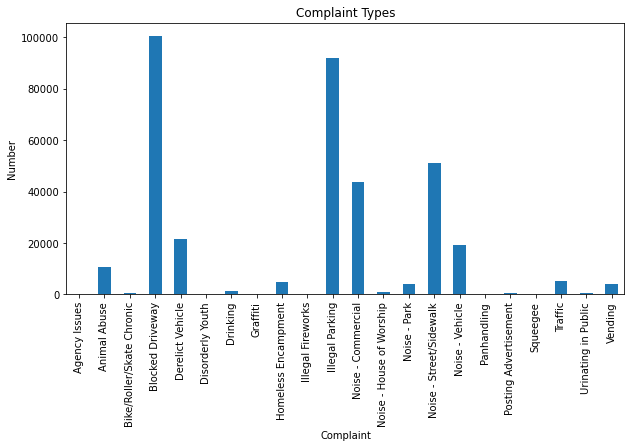

In [20]:
type_complaint.plot(kind="bar",figsize=(10, 5))
plt.title("Complaint Types")
plt.xlabel("Complaint")
plt.ylabel("Number")

- Display the types of complaints in each city in a separate dataset

In [21]:
complaint_each_city = df_service_requests.groupby(['City','Complaint Type'],as_index=False)['Unique Key'].count()
x = pd.DataFrame(complaint_each_city)
x
## x.loc[x['City'] == 'Astoria', 'Unique Key'].sum()

,City,Complaint Type,Unique Key
0,ARVERNE,Animal Abuse,46
1,ARVERNE,Blocked Driveway,50
2,ARVERNE,Derelict Vehicle,32
3,ARVERNE,Disorderly Youth,2
4,ARVERNE,Drinking,1
...,...,...,...
772,Woodside,Blocked Driveway,27
773,Woodside,Derelict Vehicle,8
774,Woodside,Illegal Parking,124
775,Woodside,Noise - Commercial,2


In [22]:
##y = df_service_requests.groupby(['City', 'Complaint Type']).size().unstack()
##y.to_excel('y.xlsx')

- Visualize the major types of complaints in each city

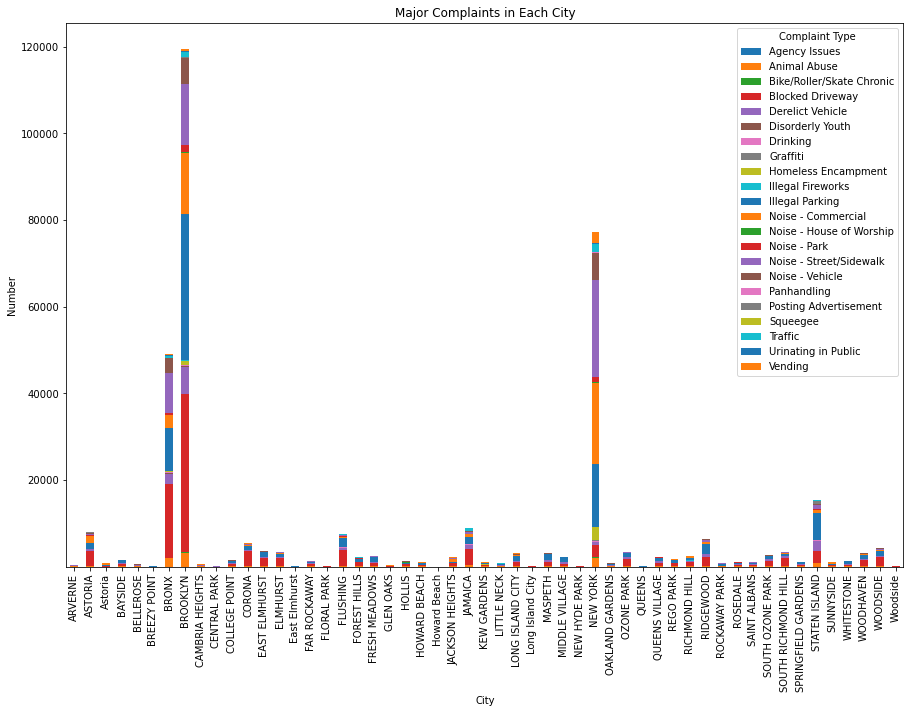

<Figure size 432x288 with 0 Axes>

In [23]:
df_service_requests.groupby(['City', 'Complaint Type']).size().unstack().plot(kind='bar',
                                                                              title='Major Complaints in Each City',
                                                                              stacked=True, 
                                                                              figsize=(15, 10), 
                                                                              legend=True,
                                                                             xlabel='City',
                                                                             ylabel='Number')
plt.show()
plt.savefig("image.jpg")

- Draw a frequency plot for city wise complaints

In [24]:
freq_plot = df_service_requests.groupby(['City'],as_index=True).count()['Complaint Type']
freq_plot = pd.DataFrame(freq_plot)

In [25]:
freq_plot_df = freq_plot['Complaint Type'].sort_values(ascending=False)
freq_plot_df = pd.DataFrame(freq_plot_df)
freq_plot_df.head()

,Complaint Type
City,
BROOKLYN,119515
NEW YORK,77281
BRONX,49163
STATEN ISLAND,15332
JAMAICA,8921


<AxesSubplot:title={'center':'Frequency Distribution'}, xlabel='City', ylabel='Number'>

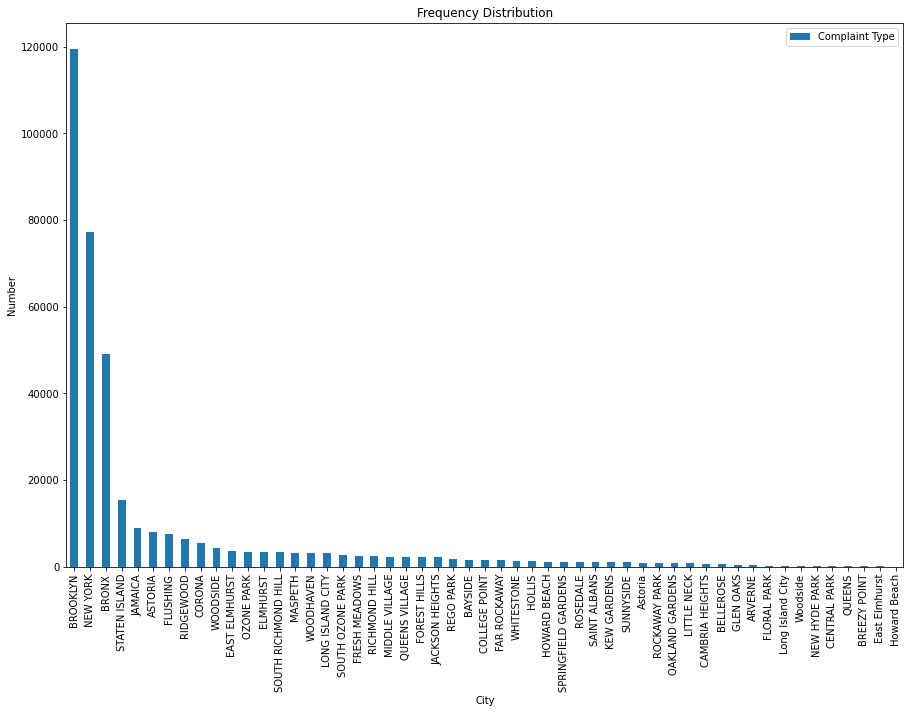

In [26]:
freq_plot_df.plot.bar(title="Frequency Distribution",figsize=(15,10),xlabel='City',ylabel='Number')

In [27]:
df_service_requests.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'City',
       'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'Latitude', 'Longitude'],
      dtype='object')

In [28]:
df_service_requests['Created Date'].unique()

array(['12/31/2015 11:59:45 PM', '12/31/2015 11:59:44 PM',
       '12/31/2015 11:59:29 PM', ...,
       datetime.datetime(2015, 1, 1, 0, 1, 30),
       datetime.datetime(2015, 1, 1, 0, 1, 29),
       datetime.datetime(2015, 1, 1, 0, 0, 50)], dtype=object)

In [29]:
df_service_requests['Closed Date'] = pd.to_datetime(df_service_requests['Closed Date'])
print(df_service_requests['Closed Date'].dtypes)

datetime64[ns]


In [30]:
df_service_requests['Resolution Action Updated Date'] = pd.to_datetime(df_service_requests['Resolution Action Updated Date'])
print(df_service_requests['Resolution Action Updated Date'].dtypes)

datetime64[ns]


In [31]:
df_service_requests['Created Date'] = pd.to_datetime(df_service_requests['Created Date'])
print(df_service_requests['Created Date'].dtypes)

datetime64[ns]


In [32]:
##df_service_requests['Created Date'] = df_service_requests['Created Date'].dt.strftime('%m/%d/%Y')
##print(df_service_requests['Created Date'].dtypes)

In [33]:
print(df_service_requests['Created Date'].dtypes)

datetime64[ns]


In [34]:
print(df_service_requests['Closed Date'].dtypes)

datetime64[ns]


In [35]:
df_service_requests['Resolution Time'] = df_service_requests['Closed Date']-df_service_requests['Created Date']

In [36]:
df_service_requests['Resolution Time']

0        0 days 00:55:30
1        0 days 01:27:13
2        0 days 04:51:34
3        0 days 07:45:27
4        0 days 03:27:44
               ...      
364553   0 days 10:17:47
364554   0 days 02:20:34
364555   0 days 00:19:03
364556   0 days 02:40:53
364557   0 days 02:47:00
Name: Resolution Time, Length: 362137, dtype: timedelta64[ns]

In [37]:
df_service_requests.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,City,Facility Type,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Resolution Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NEW YORK,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,0 days 00:55:30
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,ASTORIA,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,0 days 01:27:13


In [38]:
df_service_requests.groupby('Complaint Type')['Resolution Time'].mean()
## There are a couple of "Closed" which are in past of the "Created Date" and that is not making sense.
## That is why there are times in negative range

Complaint Type
Agency Issues                 -19 days +17:04:49.125000
Animal Abuse                  0 days 07:53:56.658594491
Bike/Roller/Skate Chronic   -1 days +11:16:29.793684211
Blocked Driveway              0 days 06:29:16.258413007
Derelict Vehicle              0 days 10:54:30.989775051
Disorderly Youth            -4 days +03:07:46.606349207
Drinking                    -1 days +23:51:22.839031340
Graffiti                    -2 days +09:58:53.668789809
Homeless Encampment           0 days 13:41:33.729751896
Illegal Fireworks             0 days 02:31:48.831395348
Illegal Parking               0 days 01:40:38.116820238
Noise - Commercial            0 days 07:20:36.659215067
Noise - House of Worship      0 days 08:18:36.929775280
Noise - Park                  0 days 14:32:14.188111545
Noise - Street/Sidewalk       0 days 12:00:39.265885666
Noise - Vehicle               0 days 06:06:52.112279792
Panhandling                   1 days 12:53:45.858461538
Posting Advertisement         0 d

- Draw scatter and hexbin plots for complaint concentration across Brooklyn

In [39]:
Brooklyn_plot = df_service_requests.loc[df_service_requests['City']=='BROOKLYN']

In [40]:
Brooklyn_plot = pd.DataFrame(Brooklyn_plot)

(-74.08561051366016, -73.79949620418894, 40.55696164632341, 40.877267742292496)

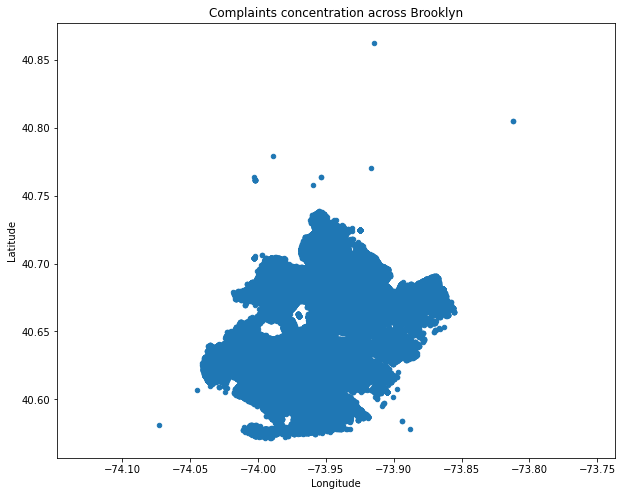

In [41]:
Brooklyn_plot[['Longitude', 'Latitude']].plot(kind='scatter',
    x='Longitude', y='Latitude', figsize=(10,8),title = 'Complaints concentration across Brooklyn').axis('equal')

(-74.08561051394626, -73.79949620390283, 40.55696164632341, 40.877267742292496)

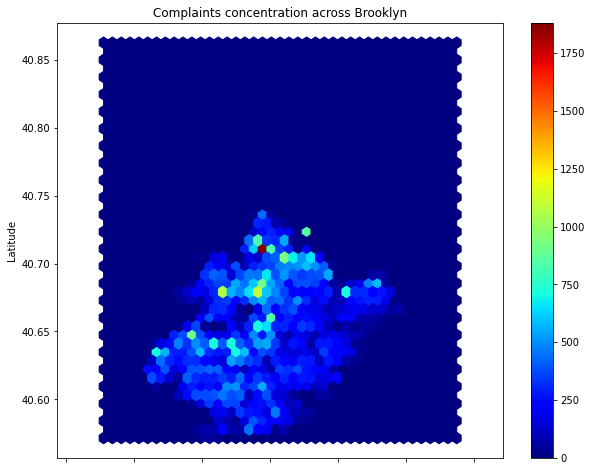

In [42]:
Brooklyn_plot[['Longitude', 'Latitude']].plot(kind='hexbin',
    x='Longitude', y='Latitude', figsize=(10,8),gridsize=40,
    colormap = 'jet',title = 'Complaints concentration across Brooklyn').axis('equal')